In [13]:
import pandas as pd
import seaborn as sns
from dfply import *
from datetime import date, datetime
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from statistics import mean

In [2]:
#scaling function
def scaling(data,lower_bound,upper_bound):
    scal_list=[]
    for i in range(0,len(data)):
        scal_list.append(((upper_bound-lower_bound)*(data[i]-min(data))/(max(data)-min(data))+lower_bound))
        i=i+1
    return scal_list

In [3]:
data_air=pd.read_csv("Airports2.csv")
data_air.head(5)

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001


In [4]:
data_air.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
count,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.599849e+06,3.599849e+06,3.599996e+06,3.599996e+06
mean,2.688910e+03,4.048297e+03,3.722890e+01,6.973190e+02,5.871502e+06,5.897982e+06,3.775029e+01,-9.186178e+01,3.774091e+01,-9.183433e+01
std,4.347617e+03,6.200871e+03,4.961970e+01,6.044165e+02,7.858062e+06,7.906127e+06,5.765453e+00,1.653773e+01,5.736556e+00,1.647228e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.288700e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02
25%,1.090000e+02,1.560000e+02,2.000000e+00,2.730000e+02,1.030597e+06,1.025470e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01
50%,1.118000e+03,1.998000e+03,2.500000e+01,5.190000e+02,2.400193e+06,2.400193e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01
75%,3.503000e+03,5.370000e+03,5.500000e+01,9.270000e+02,8.613622e+06,8.635706e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01
max,8.959700e+04,1.470620e+05,1.128000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01


In [43]:
data_air

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
6,MFR,RDM,"Medford, OR","Bend, OR",2,72,4,156,1990-01-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
7,MFR,RDM,"Medford, OR","Bend, OR",7,18,1,156,1990-09-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
8,MFR,RDM,"Medford, OR","Bend, OR",7,36,2,156,1990-11-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
9,SEA,RDM,"Seattle, WA","Bend, OR",8,18,1,228,1990-02-01,5154164,76034,47.449001,-122.308998,44.254101,-121.150001


In [4]:
data_air_no_na=data_air.dropna()
data_new_index=data_air_no_na.reset_index(drop=True)

In [5]:
data_new_index.info()
data_new_index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594452 entries, 0 to 3594451
Data columns (total 15 columns):
Origin_airport            object
Destination_airport       object
Origin_city               object
Destination_city          object
Passengers                int64
Seats                     int64
Flights                   int64
Distance                  int64
Fly_date                  object
Origin_population         int64
Destination_population    int64
Org_airport_lat           float64
Org_airport_long          float64
Dest_airport_lat          float64
Dest_airport_long         float64
dtypes: float64(4), int64(6), object(5)
memory usage: 411.4+ MB


,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
1,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
2,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
3,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
4,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
5,MFR,RDM,"Medford, OR","Bend, OR",2,72,4,156,1990-01-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
6,MFR,RDM,"Medford, OR","Bend, OR",7,18,1,156,1990-09-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
7,MFR,RDM,"Medford, OR","Bend, OR",7,36,2,156,1990-11-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001
8,SEA,RDM,"Seattle, WA","Bend, OR",8,18,1,228,1990-02-01,5154164,76034,47.449001,-122.308998,44.254101,-121.150001
9,SEA,RDM,"Seattle, WA","Bend, OR",453,3128,23,228,1990-01-01,5154164,76034,47.449001,-122.308998,44.254101,-121.150001


In [ ]:
#danger
plt.title('The box plot of all integer type variable ')
data_numeric=data_air_no_na[["Passengers","Seats","Flights","Distance","Origin_population","Destination_population"]]
fig, ax = plt.subplots()
ax.boxplot(data_numeric)
figure=fig
#mpld3.display(figure)
plt.show() 

In [4]:
#plotting the correlation matrix
corr = data_air_no_na.corr()
corr.style.background_gradient().set_precision(2)

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
Passengers,1,0.97,0.81,0.12,0.1,0.099,-0.098,-0.095,-0.098,-0.097
Seats,0.97,1,0.85,0.073,0.1,0.099,-0.088,-0.084,-0.087,-0.086
Flights,0.81,0.85,1,-0.079,0.061,0.058,-0.044,-0.06,-0.043,-0.062
Distance,0.12,0.073,-0.079,1,0.18,0.16,-0.034,-0.28,-0.046,-0.27
Origin_population,0.1,0.1,0.061,0.18,1,-0.014,0.076,0.15,-0.013,0.011
Destination_population,0.099,0.099,0.058,0.16,-0.014,1,-0.0023,0.02,0.082,0.16
Org_airport_lat,-0.098,-0.088,-0.044,-0.034,0.076,-0.0023,1,-0.047,0.35,-0.061
Org_airport_long,-0.095,-0.084,-0.06,-0.28,0.15,0.02,-0.047,1,-0.06,0.58
Dest_airport_lat,-0.098,-0.087,-0.043,-0.046,-0.013,0.082,0.35,-0.06,1,-0.034
Dest_airport_long,-0.097,-0.086,-0.062,-0.27,0.011,0.16,-0.061,0.58,-0.034,1


In [ ]:
#the relation ship between flights and seats.
sb.scatterplot(data_air_no_na["Flights"],data_air_no_na["Seats"])
#plt.savefig('books_read.png')
'''
As we see the graph tells use that there are only less flights presents for the larger distances.Their are many filghts for smaller distances.
so now i want to know why the number of flights is less for larger distances.(i can do it by checking the relation ship between the distance and the passengers.)
'''

In [ ]:
sb.scatterplot(data_air_no_na["Distance"],data_air_no_na["Passengers"] )
#As in the graph belowe showes that at less distance the number of passenger are more ,so we can now infer that as the number of passengers are less to travel long distances the number of flights are also less.
#so the conclusion is the demand is less so number of flights are also less.

In [ ]:
#The relationship between flights and seats
#fig, ax = plt.subplots()
plt.scatter(data_air_no_na["Seats"],data_air_no_na["Passengers"])
plt.title("The relationship between seats and passengers. ")
plt.xlabel('No of seats')
plt.ylabel('No of passengers')
#plt.plot(data_air_no_na["Flights"],data_air_no_na["Passengers"],color='orange')
#lt.xlabel('No of flights')
#plt.ylabel('')
#fig=plt.figure()
#mpld3.display(fig)
plt.show()
plt.savefig('seats_and_passengers.png')
#The relationship between flights and seats have positive correlation.

In [ ]:
sb.scatterplot(data_air_no_na["Seats"],data_air_no_na["Passengers"])

In [ ]:
sb.lineplot(data_air_no_na["Seats"],data_air_no_na["Passengers"])

In [6]:
data_new_index["year"] = pd.DatetimeIndex(data_new_index['Fly_date']).year
data_new_index["month"] = pd.DatetimeIndex(data_new_index['Fly_date']).month
data_new_index["day"]=pd.DatetimeIndex(data_new_index['Fly_date']).day

In [ ]:
data_new_index

In [ ]:
data_new_index.info()

In [7]:
#function for extracting season :
#The function only handle integer type of data.The argument must be dataframe.
def extract_season(data_series):
    data=data_series.tolist()
    season=[]
    i=0
    for i in range(0,len(data)):
        if(data[i] ==12 or data[i]==1 or data[i]==2):
            season.append("Winter")
        elif(data[i] == 3 or data[i] == 4 or data[i] == 5):
            season.append("Spring")
        elif(data[i]==9 or data[i]==10 or data[i]==11):
            season.append("Autumn")
        else:
            season.append("Summer")
    return(pd.Series(season))


In [ ]:
#Testing the function
s=[1,2,3,4,5,6,7,8,9,10,11,12]
se=pd.Series(s)
print(len(se))
se
seasons=extract_season(data_air_no_na["month"])
seasons.isnull().sum()
seasons.value_counts()

In [ ]:
print(len(data_new_index["month"]))
len(extract_season(data_new_index["month"]))

In [ ]:
len(data_new_index.columns)

In [ ]:
data_new_index

In [8]:
#extracting the seasons from the date of journey.
data_new_index.insert(18,"Seasons",value=extract_season(data_new_index["month"]),allow_duplicates = False)

In [ ]:
data_new_index.info()

In [ ]:
 data_new_index.isnull().sum()

In [9]:
#now we are extracting the weekdays in the data set.
data_new_index['Fly_date']= pd.to_datetime(data_new_index['Fly_date'], format="%Y-%m-%d")
data_new_index['week_days'] = data_new_index['Fly_date'].dt.day_name()

In [10]:
data_2000_above=data_new_index[data_new_index["year"]>=2000]
data_2000_above

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,year,month,day,Seasons,week_days
635,SEA,RDM,"Seattle, WA","Bend, OR",2023,4144,112,228,2000-01-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,1,1,Winter,Saturday
636,SEA,RDM,"Seattle, WA","Bend, OR",2995,4699,127,228,2000-12-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,12,1,Winter,Friday
637,SEA,RDM,"Seattle, WA","Bend, OR",3134,5328,144,228,2000-09-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,9,1,Autumn,Friday
638,SEA,RDM,"Seattle, WA","Bend, OR",3420,5328,144,228,2000-06-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,6,1,Summer,Thursday
639,SEA,RDM,"Seattle, WA","Bend, OR",3108,5106,138,228,2000-10-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,10,1,Autumn,Sunday
640,SEA,RDM,"Seattle, WA","Bend, OR",2877,4995,135,228,2000-11-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,11,1,Autumn,Wednesday
641,SEA,RDM,"Seattle, WA","Bend, OR",2795,5180,140,228,2000-03-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,3,1,Spring,Wednesday
642,SEA,RDM,"Seattle, WA","Bend, OR",2429,4440,120,228,2000-02-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,2,1,Winter,Tuesday
643,SEA,RDM,"Seattle, WA","Bend, OR",2663,4921,133,228,2000-04-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,4,1,Spring,Saturday
644,SEA,RDM,"Seattle, WA","Bend, OR",3573,5587,151,228,2000-07-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,7,1,Summer,Saturday


In [49]:
#now we are dividing our data set into two parts 
#The data set of 1990 's
#The data set of 2000 's
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2000
#aggreating the data

#monday 2000
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2000,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2000_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2000_monday


The years 2000 above unique values :-  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]

The years 2000 below unique values :-  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]


In [54]:
#Now we are going to do analysis on the 2000 's above data

data_2000_above

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,year,month,day,Seasons,week_days
635,SEA,RDM,"Seattle, WA","Bend, OR",2023,4144,112,228,2000-01-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,1,1,Winter,Saturday
636,SEA,RDM,"Seattle, WA","Bend, OR",2995,4699,127,228,2000-12-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,12,1,Winter,Friday
637,SEA,RDM,"Seattle, WA","Bend, OR",3134,5328,144,228,2000-09-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,9,1,Autumn,Friday
638,SEA,RDM,"Seattle, WA","Bend, OR",3420,5328,144,228,2000-06-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,6,1,Summer,Thursday
639,SEA,RDM,"Seattle, WA","Bend, OR",3108,5106,138,228,2000-10-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,10,1,Autumn,Sunday
640,SEA,RDM,"Seattle, WA","Bend, OR",2877,4995,135,228,2000-11-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,11,1,Autumn,Wednesday
641,SEA,RDM,"Seattle, WA","Bend, OR",2795,5180,140,228,2000-03-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,3,1,Spring,Wednesday
642,SEA,RDM,"Seattle, WA","Bend, OR",2429,4440,120,228,2000-02-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,2,1,Winter,Tuesday
643,SEA,RDM,"Seattle, WA","Bend, OR",2663,4921,133,228,2000-04-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,4,1,Spring,Saturday
644,SEA,RDM,"Seattle, WA","Bend, OR",3573,5587,151,228,2000-07-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,7,1,Summer,Saturday


In [ ]:
"""
select :- we can select multiple column
mask :- we can sub set rows based on column condition

"""

# 2000

In [82]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2000
#aggreating the data

#monday 2000
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2000,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2000_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2000_monday

[3363.3444396675263, 4823.374032674119, 41.67512181140728, 721.0205646316996]

In [83]:
#tuesday 2000
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2000,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2000_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2000_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [84]:
#wes 2000
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2000,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2000_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2000_wes

[3247.9764609482663, 4922.613371234495, 42.214559952746605, 723.4995200826935]

In [85]:
#thursday 2000
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2000,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2000_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2000_thur

[3387.080143954599, 4553.976538168731, 39.47283549034535, 719.592290123884]

In [86]:
#friday 2000
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2000,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2000_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2000_fri

[2875.0045231682893, 4492.059180995788, 38.9023202817485, 726.041813410676]

In [87]:
#saturday 2000
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2000,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2000_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2000_sat

[3259.2524806781353, 4893.443031662927, 41.68661181750187, 726.9179007728746]

In [88]:
#sunday 2000
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2000,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2000_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2000_sun

[3259.2524806781353, 4893.443031662927, 41.68661181750187, 726.9179007728746]

# 2001

In [93]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2001
#aggreating the data

#monday 2001
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2001,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2001_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2001_monday

[2606.9934635953723, 4374.181900800448, 38.46370023419204, 735.1109441084973]

In [159]:
#tuesday 2001
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2001,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2001_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2001_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [160]:
#wes 2001
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2001,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2001_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2001_wes

[3247.9764609482663, 4426.087494504114, 38.773381069028325, 729.3317630802085]

In [161]:
#thursday 2001
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2001,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2001_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2001_thur

[2830.9152446895905, 4324.657880530454, 37.956343152212185, 734.8126980401362]

In [162]:
#friday 2001
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2001,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2001_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2001_fri

[2981.452533233007, 4151.271068472536, 35.79671432154502, 730.8118259342864]

In [163]:
#saturday 2001
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2001,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2001_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2001_sat

[2155.3165545818897, 3746.8921608586375, 32.87398953875416, 752.775253039875]

In [164]:
#sunday 2001
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2001,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2001_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2001_sun

[3150.2846499251623, 4499.554565108931, 38.985331781140864, 733.4553134874438]

# 2002

In [165]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2002
#aggreating the data

#monday 2002
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2002,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2002_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2002_monday

[3203.932657903657, 4637.900041429702, 40.68460698278784, 758.1198824903017]

In [166]:
#tuesday 2002
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2002,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2002_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2002_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [167]:
#wes 2002
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2002,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2002_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2002_wes

[3247.9764609482663, 4798.890025775209, 42.1298914316957, 754.2787627899711]

In [168]:
#thursday 2002
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2002,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2002_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2002_thur

[3453.475997863085, 4872.544302831413, 42.726093261085246, 767.9238342364345]

In [169]:
#friday 2002
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2002,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2002_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2002_fri

[2602.549057199567, 3968.9220949115843, 37.40276524720318, 729.9953762179719]

In [170]:
#saturday 2002
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2002,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2002_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2002_sat

[3114.383604909913, 4387.252171416266, 38.33077309597301, 760.6634843155553]

In [171]:
#sunday 2002
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2002,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2002_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2002_sun

[2371.032260004209, 3656.294007997354, 35.6576470941944, 736.9462433480653]

# 2003

In [172]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2002
#aggreating the data

#monday 2003
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2003,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2003_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2003_monday

[2095.1594110278893, 3163.3769779391087, 34.38876249392878, 714.0175617986145]

In [173]:
#tuesday 2003
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2003,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2003_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2003_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [174]:
#wes 2003
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2003,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2003_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2003_wes

[3247.9764609482663, 3403.2712725903616, 36.75648128227194, 703.8327237521514]

In [175]:
#thursday 2003
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2003,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2003_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2003_thur

[2464.5284208113685, 3521.477194590878, 38.18708457483383, 701.1049736419894]

In [176]:
#friday 2003
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2003,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2003_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2003_fri

[2424.667712727647, 3309.231711081387, 35.70547381417841, 697.3797201358165]

In [177]:
#saturday 2003
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2003,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2003_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2003_sat

[2143.3442751632356, 3192.276947229457, 34.27828522496164, 704.6498376565455]

In [178]:
#sunday 2003
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2003,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2003_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2003_sun

[2510.8576222699016, 3407.878802882764, 36.76096165483853, 709.447433569896]

# 2004

In [179]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2004
#aggreating the data

#monday 2004
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2004,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2004_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2004_monday

[2376.454656195734, 3366.610009589716, 36.44522198895887, 716.9517663219552]

In [180]:
#tuesday 2004
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2004,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2004_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2004_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [181]:
#wes 2004
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2004,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2004_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2004_wes

[3247.9764609482663, 3131.164324717874, 34.17961412449945, 719.1940783885451]

In [182]:
#thursday 2004
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2004,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2004_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2004_thur

[2348.761436718845, 3340.244075788306, 36.052732851422334, 712.463015930799]

In [183]:
#friday 2004
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2004,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2004_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2004_fri

[2319.4773960217, 3297.0470162748643, 35.96510434485118, 704.7103269634915]

In [184]:
#saturday 2004
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2004,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2004_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2004_sat

[2347.528500304816, 3285.7206360495834, 35.45112781954887, 708.9661654135339]

In [185]:
#sunday 2004
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2004,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2004_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2004_sun

[2321.500823723229, 3340.5840851442167, 36.15653356345284, 709.7436782510918]

# 2005

In [186]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2005
#aggreating the data

#monday 2005
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2005,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2005_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2005_monday

[2605.128554713334, 3500.6667344966168, 37.780892302996385, 713.6386528971867]

In [187]:
#tuesday 2005
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2005,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2005_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2005_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [188]:
#wes 2005
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2005,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2005_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2005_wes

[3247.9764609482663, 3421.4321492461027, 36.904267825198055, 710.1201124456938]

In [189]:
#thursday 2005
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2005,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2005_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2005_thur

[2275.0825851866966, 3206.8260559069577, 34.91422668843093, 722.32075086717]

In [190]:
#friday 2005
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2005,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2005_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2005_fri

[2681.7085246766956, 3556.0839007653735, 38.20686196885722, 713.0108207970441]

In [191]:
#saturday 2005
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2005,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2005_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2005_sat

[2209.0846486377804, 3223.747386146577, 34.916557756107366, 712.4902734492812]

In [192]:
#sunday 2005
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2005,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2005_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2005_sun

[2745.3291620727673, 3750.396527012128, 40.42309812568909, 715.5017640573319]

# 2006

In [193]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2006
#aggreating the data

#monday 2006
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2006,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2006_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2006_monday

[2708.495004691726, 3495.766407241817, 37.85588121653696, 720.4728707843462]

In [194]:
#tuesday 2006
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2006,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2006_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2006_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [195]:
#wes 2006
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2006,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2006_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2006_wes

[3247.9764609482663, 3330.3448269561086, 35.92011109892921, 718.5699850162629]

In [196]:
#thursday 2006
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2006,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2006_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2006_thur

[2704.937971723185, 3336.9893696183694, 36.06489847985543, 719.381205485277]

In [197]:
#friday 2006
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2006,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2006_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2006_fri

[2239.127192103417, 3140.7785599759495, 33.750175368273375, 726.1666499649264]

In [198]:
#saturday 2006
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2006,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2006_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2006_sat

[2740.948027001811, 3476.6457384336754, 37.37412875253828, 720.5975248339828]

In [199]:
#sunday 2006
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2006,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2006_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2006_sun

[2368.0468056846858, 3352.5703811927215, 36.03540974897064, 707.9943153141187]

# 2007

In [200]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2007
#aggreating the data

#monday 2007
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2007,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2007_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2007_monday

[2406.9808875335193, 3380.268967874231, 36.10197697039802, 717.6009253903991]

In [201]:
#tuesday 2007
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2007,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2007_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2007_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [202]:
#wes 2007
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2007,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2007_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2007_wes

[3247.9764609482663, 3317.606807453416, 35.48387577639752, 711.3652173913043]

In [203]:
#thursday 2007
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2007,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2007_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2007_thur

[2328.533611238202, 3120.5292562655686, 33.310999271346994, 712.445969532137]

In [204]:
#friday 2007
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2007,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2007_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2007_fri

[2546.8613492178797, 3088.367087994576, 33.01598140345779, 720.8951523076178]

In [205]:
#saturday 2007
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2007,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2007_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2007_sat

[2169.1539015952335, 3019.545502594657, 32.02167019027484, 719.7266240630405]

In [206]:
#sunday 2007
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2007,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2007_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2007_sun

[2649.3131435337727, 3324.831934719934, 35.30475185337726, 717.5228840609556]

# 2008

In [207]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2008
#aggreating the data

#monday 2008
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2008,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2008_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2008_monday

[2207.702614379085, 3044.105971958676, 31.68854100780097, 711.7772243305925]

In [208]:
#tuesday 2008
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2008,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2008_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2008_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [209]:
#wes 2008
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2008,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2008_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2008_wes

[3247.9764609482663, 3508.2232842008293, 36.568286503915246, 706.5207853523722]

In [210]:
#thursday 2008
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2008,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2008_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2008_thur

[2653.7303040034253, 3436.1673089274245, 36.29217512309998, 706.7690537358168]

In [211]:
#friday 2008
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2008,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2008_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2008_fri

[2338.520026313792, 3100.3883561470534, 32.68398147913873, 702.2900842547377]

In [212]:
#saturday 2008
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2008,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2008_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2008_sat

[2373.2710584286165, 3165.7661281863, 33.13967271582923, 705.7384873596978]

In [213]:
#sunday 2008
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2008,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2008_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2008_sun

[2490.6248776189545, 3119.810211474447, 32.75122381045624, 696.5204131584101]

# 2009

In [214]:
#now we are more dividing our analysis year wise.
#At first we are doing analysis for year 2009
#aggreating the data

#monday 2009
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2009,data_2000_above.week_days=="Monday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2009_monday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2009_monday

[2665.922419571046, 3311.1498547810547, 34.44504021447721, 714.7610589812332]

In [215]:
#tuesday 2009
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2009,data_2000_above.week_days=="Tuesday")) 

avg_passengers=mean(avg_tuesday.Passengers)
avg_seats=mean(avg_tuesday.Seats)
avg_flights=mean(avg_tuesday.Flights)
avg_distance=mean(avg_tuesday.Distance)
avg_2009_tuesday=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2009_tuesday

[3247.9764609482663, 4861.119892733435, 41.68091921486834, 717.9164959588811]

In [216]:
#wes 2009
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2009,data_2000_above.week_days=="Wednesday")) 

avg_passengers=mean(avg_we.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2009_wes=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2009_wes

[3247.9764609482663, 3474.6346439277086, 36.16477983760659, 708.200518029161]

In [217]:
#thursday 2009
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2009,data_2000_above.week_days=="Thursday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2009_thur=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2009_thur

[2360.8224701786426, 3249.1948233548314, 33.89264311397751, 712.6626619485189]

In [218]:
#friday 2009
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2009,data_2000_above.week_days=="Friday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2009_fri=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2009_fri

[2615.6711789887772, 3412.035462223765, 35.434744880249916, 709.041305102395]

In [219]:
#saturday 2009
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2009,data_2000_above.week_days=="Saturday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2009_sat=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2009_sat

[2778.300368408934, 3496.5530739120422, 36.276134008749715, 715.0051231867373]

In [220]:
#sunday 2009
avg=(data_2000_above >>
 select(data_2000_above.Passengers,data_2000_above.Seats ,data_2000_above.Flights ,data_2000_above.Distance) >>
    mask(data_2000_above.year==2009,data_2000_above.week_days=="Sunday")) 

avg_passengers=mean(avg.Passengers)
avg_seats=mean(avg.Seats)
avg_flights=mean(avg.Flights)
avg_distance=mean(avg.Distance)
avg_2009_sun=[avg_passengers,avg_seats,avg_flights,avg_distance]
avg_2009_sun

[2354.698581763347, 3180.1990685067476, 33.1374525186585, 708.3302601691195]

# plotting graphs for above analysis.

In [ ]:
list_years=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]

sse.pairplot(df)

# counting the number of origin_airport and Destination_airport.

In [222]:
data_2000_above

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,year,month,day,Seasons,week_days
635,SEA,RDM,"Seattle, WA","Bend, OR",2023,4144,112,228,2000-01-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,1,1,Winter,Saturday
636,SEA,RDM,"Seattle, WA","Bend, OR",2995,4699,127,228,2000-12-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,12,1,Winter,Friday
637,SEA,RDM,"Seattle, WA","Bend, OR",3134,5328,144,228,2000-09-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,9,1,Autumn,Friday
638,SEA,RDM,"Seattle, WA","Bend, OR",3420,5328,144,228,2000-06-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,6,1,Summer,Thursday
639,SEA,RDM,"Seattle, WA","Bend, OR",3108,5106,138,228,2000-10-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,10,1,Autumn,Sunday
640,SEA,RDM,"Seattle, WA","Bend, OR",2877,4995,135,228,2000-11-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,11,1,Autumn,Wednesday
641,SEA,RDM,"Seattle, WA","Bend, OR",2795,5180,140,228,2000-03-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,3,1,Spring,Wednesday
642,SEA,RDM,"Seattle, WA","Bend, OR",2429,4440,120,228,2000-02-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,2,1,Winter,Tuesday
643,SEA,RDM,"Seattle, WA","Bend, OR",2663,4921,133,228,2000-04-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,4,1,Spring,Saturday
644,SEA,RDM,"Seattle, WA","Bend, OR",3573,5587,151,228,2000-07-01,6104758,116618,47.449001,-122.308998,44.254101,-121.150001,2000,7,1,Summer,Saturday


In [252]:
count_origin_airport=[]
count_destination_airport=[]
#2000
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2000))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2001
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2001))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2002
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2002))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2003
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2003))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2004
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2004))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2005
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2005))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2006
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2006))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2007
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2007))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2008
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2008))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

#2009
qq=(data_2000_above >>
 select(X.Origin_airport,X.year,X.Destination_airport) >>
    mask(X.year==2009))
count_origin_airport.append(len(qq["Origin_airport"].unique().tolist()))
count_destination_airport.append(len(qq["Destination_airport"].unique().tolist()))

# plotting the graph for the above analysis

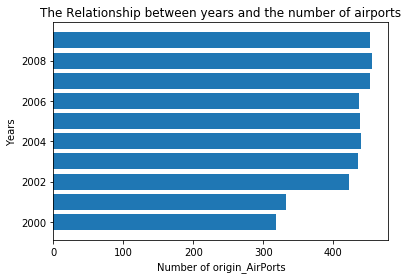

<Figure size 432x288 with 0 Axes>

In [275]:
li=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]
#d = {'Years':li,'origin_airport':count_origin_airport,'destination_airport':count_destination_airport}    
#plotting the graph to show the relationship between number of years and the number of airports at origin and destination
plt.title("The Relationship between years and the number of airports")
plt.xlabel("Number of origin_AirPorts")
plt.ylabel("Years")
plt.barh(li, count_origin_airport)
plt.show()
plt.savefig('The_relation_number.jpg')

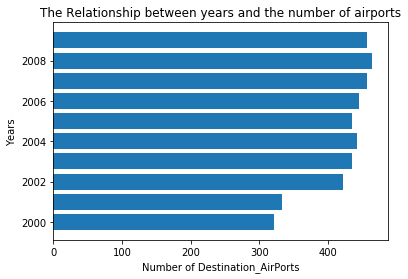

<Figure size 432x288 with 0 Axes>

In [272]:
plt.title("The Relationship between years and the number of airports")
plt.xlabel("Number of Destination_AirPorts")
plt.ylabel("Years")
plt.barh(li, count_destination_airport)
plt.show()
plt.savefig('The_relation_number_des.png')

In [338]:
#Now checking the number of passengers by year 
passengers_number=[]
#2000
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2000))
passengers_number.append(qq["Passengers"].sum())

#2001
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2001))
passengers_number.append(qq["Passengers"].sum())

#2002
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2002))
passengers_number.append(qq["Passengers"].sum())

#2003
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2003))
passengers_number.append(qq["Passengers"].sum())

#2004
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2004))
passengers_number.append(qq["Passengers"].sum())

#2005
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2005))
passengers_number.append(qq["Passengers"].sum())

#2006
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2006))
passengers_number.append(qq["Passengers"].sum())

#2007
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2007))
passengers_number.append(qq["Passengers"].sum())

#2008
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2008))
passengers_number.append(qq["Passengers"].sum())

#2009
qq=(data_2000_above >>
 select(X.year,X.Passengers) >>
    mask(X.year==2009))
passengers_number.append(qq["Passengers"].sum())

print(passengers_number)

[533754431, 496814633, 485776475, 508709839, 546244317, 568119994, 564651903, 579107985, 554915258, 526150065]


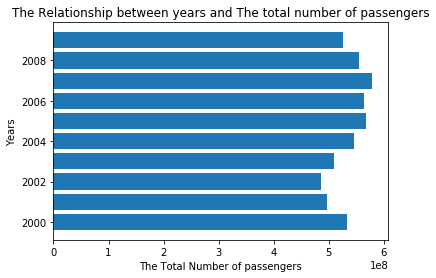

In [279]:
plt.title("The Relationship between years and The total number of passengers")
plt.xlabel("The Total Number of passengers")
plt.ylabel("Years")
plt.barh(li,passengers_number)
plt.show()

In [336]:
#number of flights by year
flights_number=[]
#2000
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2000))
flights_number.append(qq["Flights"].sum())

#2001
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2001))
flights_number.append(qq["Flights"].sum())

#2002
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2002))
flights_number.append(qq["Flights"].sum())

#2003
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2003))
flights_number.append(qq["Flights"].sum())

#2004
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2004))
flights_number.append(qq["Flights"].sum())

#2005
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2005))
flights_number.append(qq["Flights"].sum())

#2006
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2006))
flights_number.append(qq["Flights"].sum())

#2007
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2007))
flights_number.append(qq["Flights"].sum())

#2008
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2008))
flights_number.append(qq["Flights"].sum())

#2009
qq=(data_2000_above >>
 select(X.year,X.Flights) >>
    mask(X.year==2009))
flights_number.append(qq["Flights"].sum())

print(flights_number)


[6815322, 6633759, 6764609, 8003967, 8408014, 8466263, 8107865, 8138075, 7758820, 7191474]


In [343]:
#scaling the data
print(scaling(flights_number,100,500))
print(scaling(passengers_number,100,500))

[139.6316733824319, 100.0, 128.56201132439548, 399.08977006325773, 487.28537563901637, 500.0, 421.7686837245649, 428.3629394533382, 345.5789455302689, 221.73834272667347]
[305.6238284369341, 147.30731561077283, 100.0, 198.28776583599688, 359.152957023839, 452.9076900180871, 438.04415250540785, 500.0, 396.3148587224186, 273.0330517528324]


In [341]:
#now plotting the relationship between no_flights,no_passengers,no_air_port_origin_airport,no_air_port_destination

[139.6316733824319, 100.0, 128.56201132439548, 399.08977006325773, 487.28537563901637, 500.0, 421.7686837245649, 428.3629394533382, 345.5789455302689, 221.73834272667347]
[305.6238284369341, 147.30731561077283, 100.0, 198.28776583599688, 359.152957023839, 452.9076900180871, 438.04415250540785, 500.0, 396.3148587224186, 273.0330517528324]


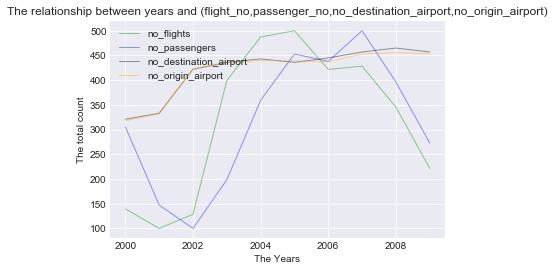

In [354]:
plt.style.use('seaborn-darkgrid')
plt.plot(li,scaling(flights_number,100,500), label='no_flights',marker='', color='green', linewidth=1, alpha=0.4)
plt.plot(li,scaling(passengers_number,100,500),label='no_passengers',marker='', color='blue', linewidth=1, alpha=0.4)
plt.plot(li,count_destination_airport,label='no_destination_airport', marker='', color='black', linewidth=1, alpha=0.4)
plt.plot(li,count_origin_airport,label='no_origin_airport',marker='', color='orange', linewidth=1, alpha=0.4)
plt.title("The relationship between years and (flight_no,passenger_no,no_destination_airport,no_origin_airport)")
plt.xlabel("The Years")
plt.ylabel("The total count")
plt.legend(loc='upper left')
plt.show()

# Model building Predicting 

In [23]:
#Libraries used for model building
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [373]:
#summary of the model.
data_2000_above.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,year,month,day
count,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2.111888e+06,2111888.0
mean,2.540023e+03,3.564356e+03,3.612321e+01,7.178050e+02,5.889747e+06,5.917293e+06,3.775785e+01,-9.206251e+01,3.774165e+01,-9.201810e+01,2.004757e+03,6.573236e+00,1.0
std,4.366718e+03,5.855759e+03,4.853960e+01,6.154623e+02,7.955037e+06,8.001639e+06,5.834160e+00,1.660053e+01,5.793062e+00,1.651453e+01,2.766821e+00,3.469232e+00,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.300500e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02,2.000000e+03,1.000000e+00,1.0
25%,6.600000e+01,1.240000e+02,2.000000e+00,2.880000e+02,1.031458e+06,1.016377e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01,2.003000e+03,4.000000e+00,1.0
50%,8.120000e+02,1.308000e+03,2.200000e+01,5.430000e+02,2.144528e+06,2.144528e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01,2.005000e+03,7.000000e+00,1.0
75%,3.258000e+03,4.521000e+03,5.400000e+01,9.370000e+02,8.913164e+06,8.913164e+06,4.173260e+01,-8.094310e+01,4.173260e+01,-8.094310e+01,2.007000e+03,1.000000e+01,1.0
max,8.959700e+04,1.167850e+05,1.036000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01,2.009000e+03,1.200000e+01,1.0


In [20]:
#extracting the columns which are important for model building.
x=(data_2000_above >>
                select(X.Passengers,X.Seats,X.Distance,X.Origin_population,X.Destination_population))
y=(data_2000_above >>
      select(X.Flights))

In [396]:
#data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
#Now dividing the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [388]:
#Building the XGBoost model.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [389]:
xg_reg.fit(X_train,y_train)
#preds = xg_reg.predict(X_test)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [390]:
#predicting the values by XGboost
preds = xg_reg.predict(X_test)

In [391]:
#calculating the error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 40.730785


In [11]:
x=(data_2000_above >>
                select(X.Flights,X.Seats,X.Distance,X.Origin_population,X.Destination_population))
y=(data_2000_above >>
      select(X.Passengers))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [16]:
#Building the XGBoost model.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [17]:
xg_reg.fit(X_train,y_train)
#preds = xg_reg.predict(X_test)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [18]:
preds = xg_reg.predict(X_test)

In [19]:
#calculating the error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3290.336951


In [32]:
#random forest 
model = RandomForestRegressor(n_estimators=12)

In [33]:
model.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print(mean_absolute_percentage_error(y_test, preds))

RMSE: 2044.940536


MemoryError: 

In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [43]:
print(mean_absolute_percentage_error(y_test, preds))

MemoryError: 